In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


In [4]:
df = pd.read_csv("C:\\Users\\ruchi\\OneDrive\\Desktop\\streamlit_app\\medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Load dataset
df = pd.read_csv('C:\\Users\\ruchi\\OneDrive\\Desktop\\streamlit_app\\medical_insurance.csv')

# Clean data: Check and remove duplicates (no major missing values in this dataset)
print(f"Original shape: {df.shape}")
print(f"Duplicates: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"After cleaning: {df.shape}")

# Feature engineering
def bmi_category(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi < 25:
        return 'normal'
    elif 25 <= bmi < 30:
        return 'overweight'
    else:
        return 'obese'

df['bmi_category'] = df['bmi'].apply(bmi_category)
df['age_smoker'] = df['age'] * df['smoker'].map({'yes': 1, 'no': 0})  # Interaction term

# Define preprocessor
categorical_features = ['sex', 'smoker', 'region', 'bmi_category']
numerical_features = ['age', 'bmi', 'children', 'age_smoker']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Prepare X and y
X = df.drop('charges', axis=1)
y = df['charges']
X_processed = preprocessor.fit_transform(X)

# Save cleaned dataset and preprocessor (for app use)
df.to_csv('cleaned_medical_insurance.csv', index=False)
import joblib
joblib.dump(preprocessor, 'preprocessor.pkl')
print("Preprocessing complete. Files saved: cleaned_medical_insurance.csv, preprocessor.pkl")

Original shape: (2772, 7)
Duplicates: 1435
After cleaning: (1337, 7)
Preprocessing complete. Files saved: cleaned_medical_insurance.csv, preprocessor.pkl


Univariate Analysis:
Average BMI: 30.66


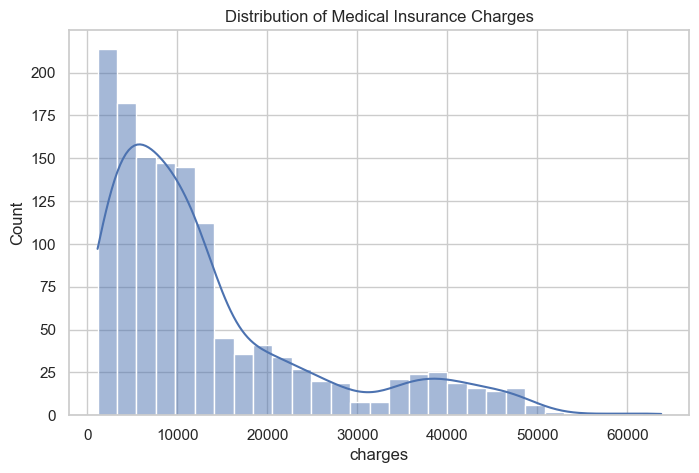

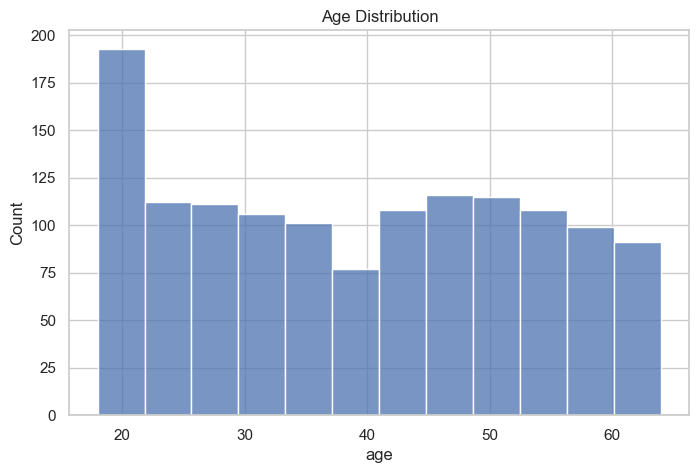

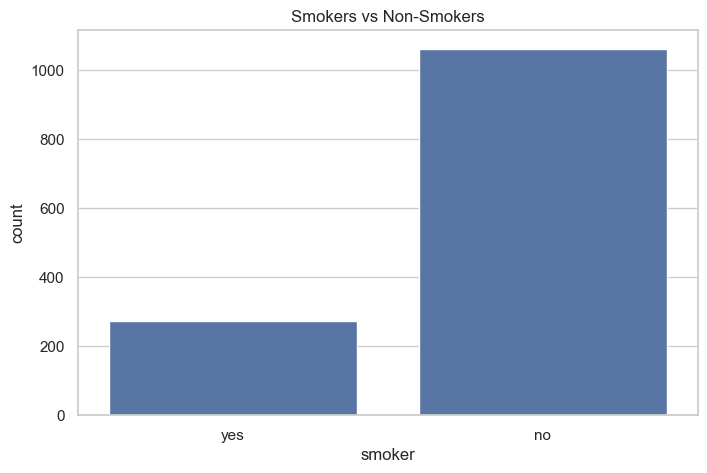

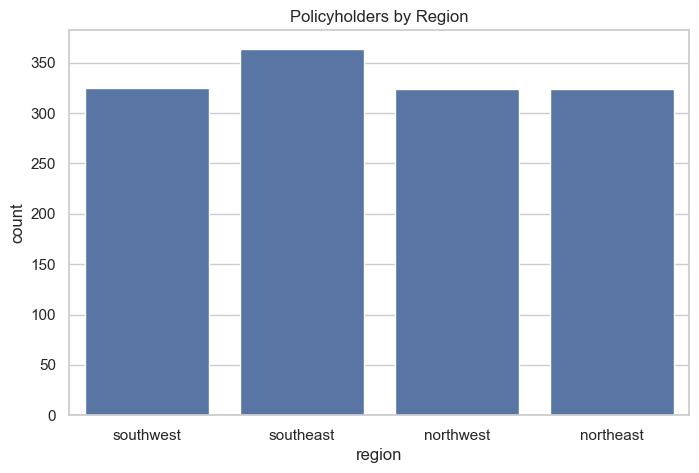

Bivariate Analysis:


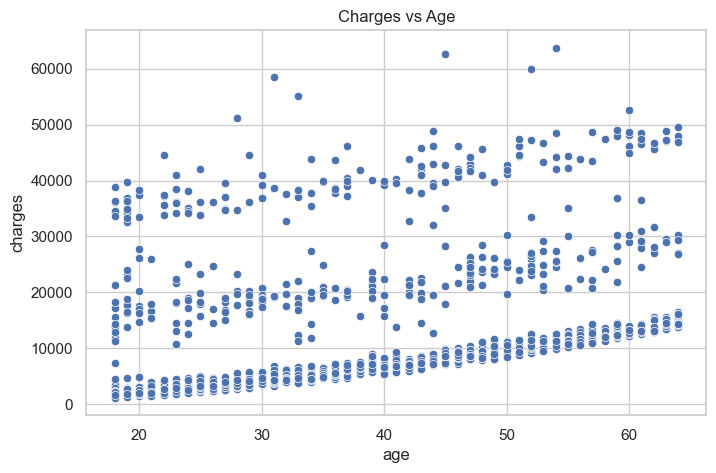

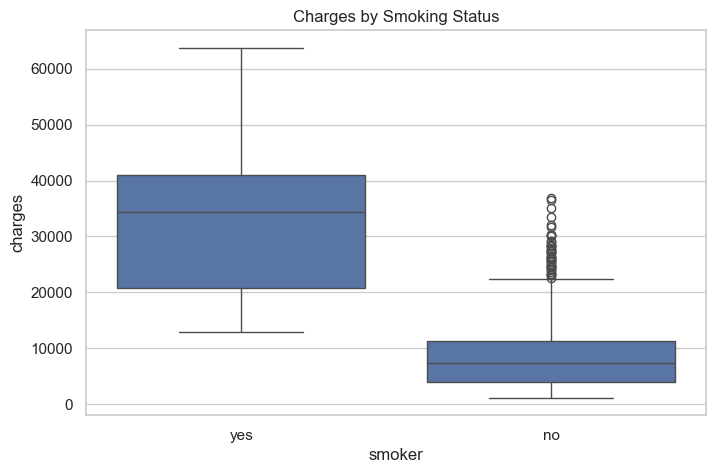

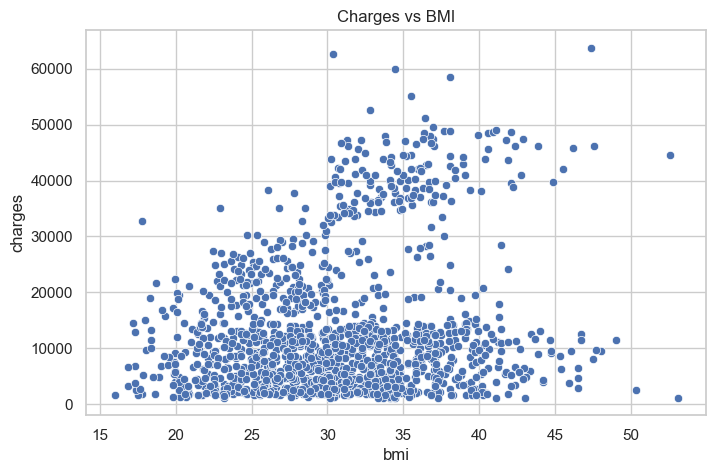

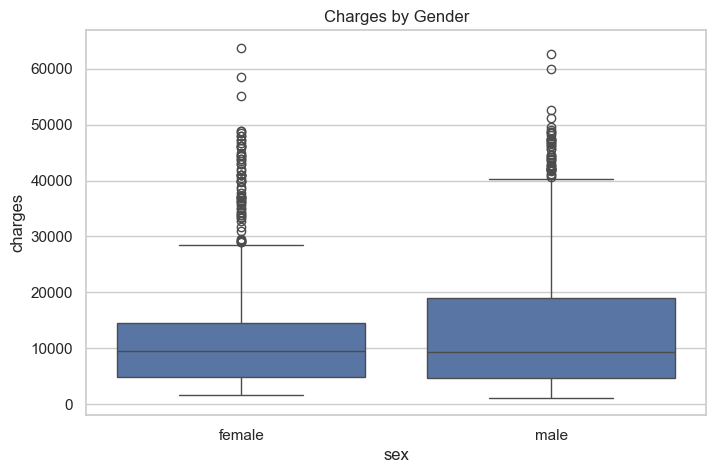

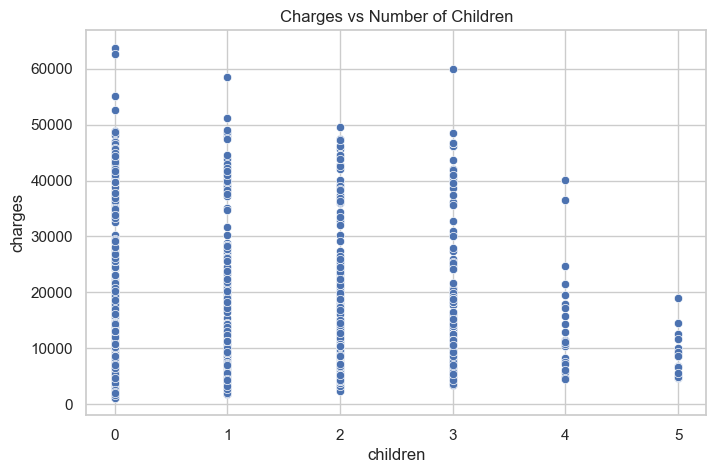

Multivariate Analysis:


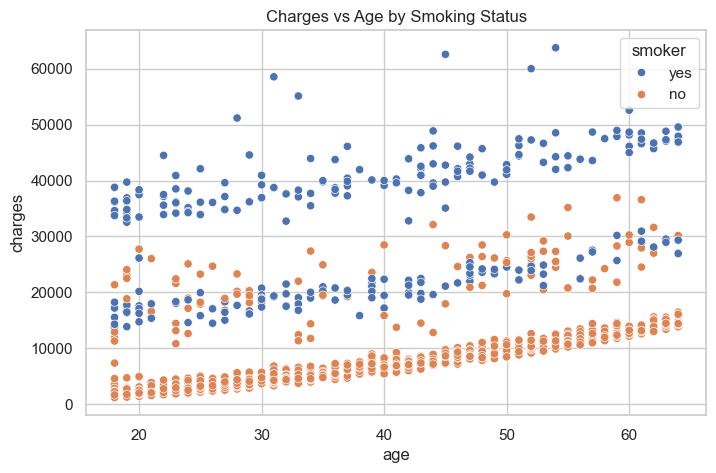

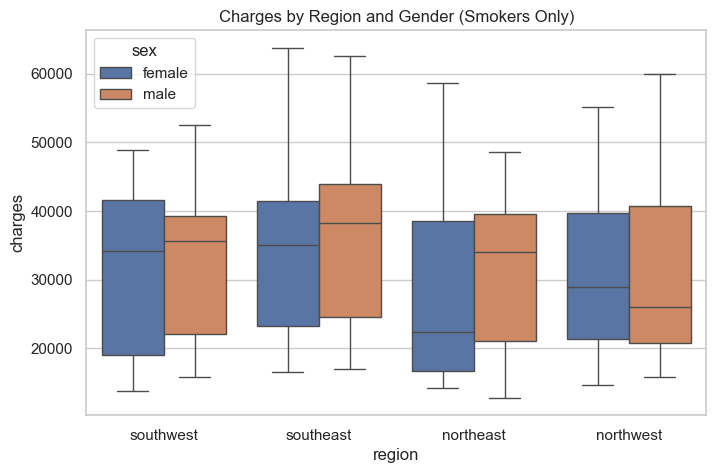

<Figure size 800x500 with 0 Axes>

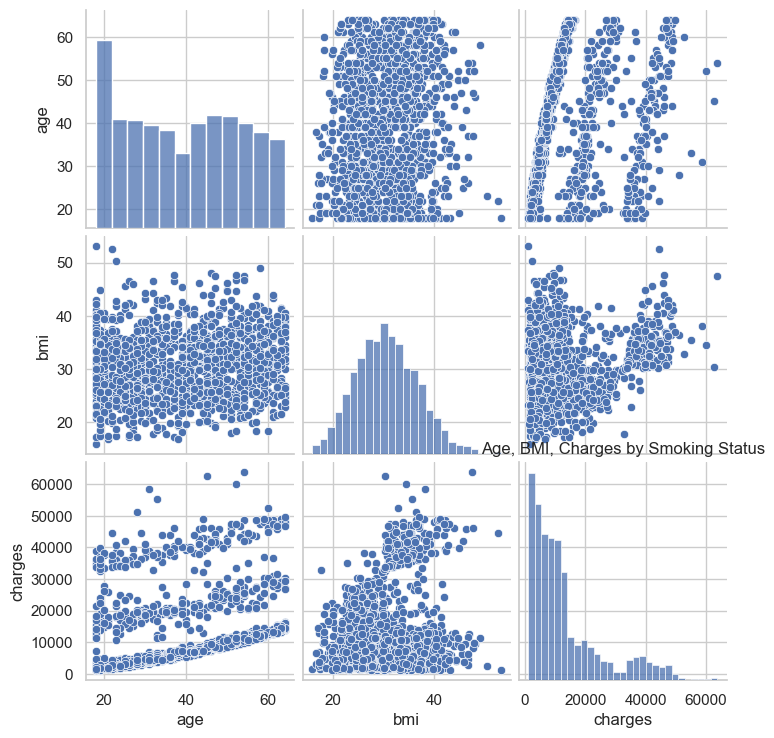

Average charges for obese smokers: $41692.81
Outlier Detection:


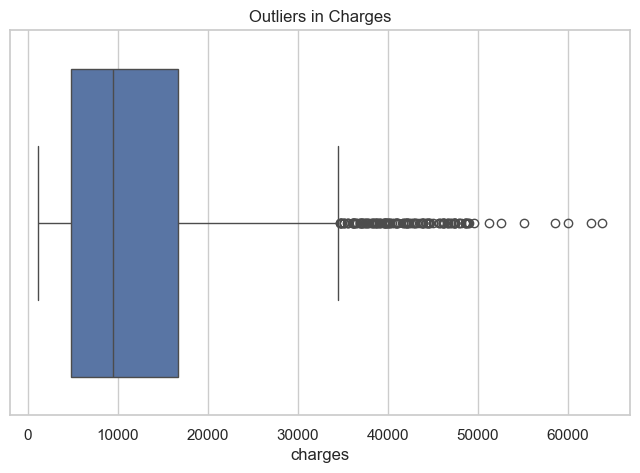

Extreme BMI individuals: 3
Correlation Analysis:


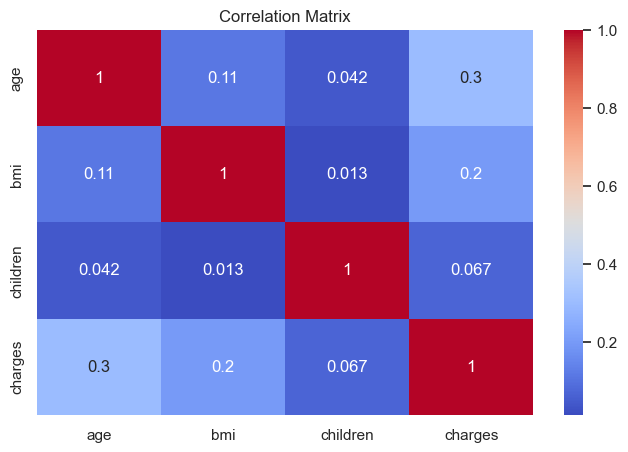

EDA complete. Visualizations saved as PNG files.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv('cleaned_medical_insurance.csv')

# Set style
sns.set(style='whitegrid')

# 1. Univariate Analysis
print("Univariate Analysis:")
print(f"Average BMI: {df['bmi'].mean():.2f}")
plt.figure(figsize=(8, 5))
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Medical Insurance Charges')
plt.savefig('charges_distribution.png')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df['age'])
plt.title('Age Distribution')
plt.savefig('age_distribution.png')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='smoker', data=df)
plt.title('Smokers vs Non-Smokers')
plt.savefig('smoker_count.png')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='region', data=df)
plt.title('Policyholders by Region')
plt.savefig('region_count.png')
plt.show()

# 2. Bivariate Analysis
print("Bivariate Analysis:")
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Charges vs Age')
plt.savefig('charges_vs_age.png')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoking Status')
plt.savefig('charges_by_smoker.png')
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('Charges vs BMI')
plt.savefig('charges_vs_bmi.png')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Charges by Gender')
plt.savefig('charges_by_gender.png')
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x='children', y='charges', data=df)
plt.title('Charges vs Number of Children')
plt.savefig('charges_vs_children.png')
plt.show()

# 3. Multivariate Analysis
print("Multivariate Analysis:")
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Charges vs Age by Smoking Status')
plt.savefig('charges_age_smoker.png')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='region', y='charges', hue='sex', data=df[df['smoker'] == 'yes'])
plt.title('Charges by Region and Gender (Smokers Only)')
plt.savefig('charges_region_gender_smoker.png')
plt.show()

plt.figure(figsize=(8, 5))
sns.pairplot(df[['age', 'bmi', 'charges']])


plt.title('Age, BMI, Charges by Smoking Status')
plt.savefig('pairplot_age_bmi_charges.png')
plt.show()

obese_smokers = df[(df['bmi'] > 30) & (df['smoker'] == 'yes')]
print(f"Average charges for obese smokers: ${obese_smokers['charges'].mean():.2f}")

# 4. Outlier Detection
print("Outlier Detection:")
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['charges'])
plt.title('Outliers in Charges')
plt.savefig('outliers_charges.png')
plt.show()

extreme_bmi = df[df['bmi'] > 50]
print(f"Extreme BMI individuals: {len(extreme_bmi)}")

# 5. Correlation Analysis
print("Correlation Analysis:")
numeric_df = df[['age', 'bmi', 'children', 'charges']]
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

print("EDA complete. Visualizations saved as PNG files.")

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Load dataset
df = pd.read_csv('C:\\Users\\ruchi\\OneDrive\\Desktop\\streamlit_app\\medical_insurance.csv')

# Clean data: Check and remove duplicates (no major missing values in this dataset)
print(f"Original shape: {df.shape}")
print(f"Duplicates: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"After cleaning: {df.shape}")

# Feature engineering
def bmi_category(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi < 25:
        return 'normal'
    elif 25 <= bmi < 30:
        return 'overweight'
    else:
        return 'obese'

df['bmi_category'] = df['bmi'].apply(bmi_category)
df['age_smoker'] = df['age'] * df['smoker'].map({'yes': 1, 'no': 0})  # Interaction term

# Define preprocessor
categorical_features = ['sex', 'smoker', 'region', 'bmi_category']
numerical_features = ['age', 'bmi', 'children', 'age_smoker']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Prepare X and y
X = df.drop('charges', axis=1)
y = df['charges']
X_processed = preprocessor.fit_transform(X)

# Save cleaned dataset and preprocessor (for app use)
df.to_csv('cleaned_medical_insurance.csv', index=False)
import joblib
joblib.dump(preprocessor, 'preprocessor.pkl')
print("Preprocessing complete. Files saved: cleaned_medical_insurance.csv, preprocessor.pkl")

Original shape: (2772, 7)
Duplicates: 1435
After cleaning: (1337, 7)
Preprocessing complete. Files saved: cleaned_medical_insurance.csv, preprocessor.pkl


In [4]:
import pandas as pd
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import joblib

# Load processed data
df = pd.read_csv('C:\\Users\\ruchi\\OneDrive\\Desktop\\streamlit_app\\env\\Scripts\\cleaned_medical_insurance.csv')
preprocessor = joblib.load('C:\\Users\\ruchi\\OneDrive\\Desktop\\streamlit_app\\env\\preprocessor.pkl')

X = df.drop('charges', axis=1)
y = df['charges']
X_processed = preprocessor.transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Set MLflow experiment
mlflow.set_experiment('Medical Insurance Prediction')

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf')
}

best_model = None
best_rmse = float('inf')

for name, model in models.items():
    with mlflow.start_run(run_name=name):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        mlflow.log_param('model', name)
        mlflow.log_metric('RMSE', rmse)
        mlflow.log_metric('MAE', mae)
        mlflow.log_metric('R2', r2)
        mlflow.sklearn.log_model(model, 'model')
        
        print(f"{name}: RMSE={rmse:.2f}, MAE={mae:.2f}, R2={r2:.2f}")
        
        if rmse < best_rmse:
            best_rmse = rmse
            best_model = model

# Register best model (manually in MLflow UI or via API)
print(f"Best model: {best_model.__class__.__name__} with RMSE={best_rmse:.2f}")
print("Training complete. Check MLflow UI for logs.")

2025/11/23 17:08:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/23 17:08:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/23 17:08:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Linear Regression: RMSE=5956.34, MAE=4177.05, R2=0.81


2025/11/23 17:08:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Ridge: RMSE=5964.28, MAE=4185.40, R2=0.81


2025/11/23 17:08:32 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/23 17:08:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest: RMSE=4659.93, MAE=2580.18, R2=0.88


2025/11/23 17:08:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/23 17:08:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/23 17:08:44 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


XGBoost: RMSE=5059.14, MAE=2857.00, R2=0.86


2025/11/23 17:08:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


SVR: RMSE=14425.24, MAE=9260.16, R2=-0.13
Best model: RandomForestRegressor with RMSE=4659.93
Training complete. Check MLflow UI for logs.


In [7]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow.xgboost  # Use this if the best model is XGBoost; change to mlflow.sklearn if it's another model
import numpy as np

# Load data
df = pd.read_csv('C:\\Users\\ruchi\\OneDrive\\Desktop\\streamlit_app\\env\\Scripts\\cleaned_medical_insurance.csv')  # Adjust path if needed

# Load the registered model from MLflow Model Registry
# Assuming the best model is XGBoost (from training script); change to mlflow.sklearn if it's Linear/Random Forest
try:
    model = mlflow.xgboost.load_model("models:/Best_Insurance_Model/Production")  # Correct URI for registered model
    st.success("Model loaded successfully!")
except Exception as e:
    st.error(f"Failed to load model: {e}. Ensure the model is registered in MLflow.")
    st.stop()  # Stop the app if model can't load

st.title("Medical Insurance Cost Prediction")

# EDA Section
st.header("EDA Insights")
st.subheader("Charges Distribution")
fig, ax = plt.subplots()
sns.histplot(df['charges'], kde=True, ax=ax)
st.pyplot(fig)

st.subheader("Charges by Smoking Status")
fig, ax = plt.subplots()
sns.boxplot(x='smoker', y='charges', data=df, ax=ax)
st.pyplot(fig)

# Prediction Section
st.header("Predict Your Insurance Cost")
age = st.slider("Age", 18, 100, 30)
sex = st.selectbox("Gender", ["female", "male"])
bmi = st.slider("BMI", 10.0, 50.0, 25.0)
children = st.slider("Number of Children", 0, 10, 0)
smoker = st.selectbox("Smoker", ["no", "yes"])
region = st.selectbox("Region", ["northeast", "northwest", "southeast", "southwest"])

# Encode inputs (must match preprocessing in data_preprocessing.py)
sex_enc = 0 if sex == "female" else 1
smoker_enc = 0 if smoker == "no" else 1
# One-hot for region (drop 'northeast' as first, so northwest, southeast, southwest)
region_enc = [
    1 if region == "northwest" else 0,
    1 if region == "southeast" else 0,
    1 if region == "southwest" else 0
]
# BMI category (0: underweight, 1: normal, 2: overweight, 3: obese)
bmi_cat = 0 if bmi < 18.5 else (1 if bmi < 25 else (2 if bmi < 30 else 3))
# Interaction terms
age_smoker = age * smoker_enc
bmi_smoker = bmi * smoker_enc

# Prepare input as numpy array (match feature order from training)
input_data = np.array([[age, sex_enc, bmi, children, smoker_enc, *region_enc, bmi_cat, age_smoker, bmi_smoker]])
prediction = model.predict(input_data)[0]
st.write(f"Estimated Cost: ${prediction:.2f}")
st.write("Note: This is an estimate; actual costs vary. (Optional: Add confidence intervals if your model supports it.)")


2025-11-23 17:17:42.759 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 17:17:43.073 
  command:

    streamlit run c:\Users\ruchi\OneDrive\Desktop\streamlit_app\env\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-11-23 17:17:43.075 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 17:17:43.076 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 17:17:43.078 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 17:17:43.080 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 17:17:43.081 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 17:17:43.08

In [10]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Generate features with realistic ranges (approximated from audio feature literature)
data = {
    'mean_spectral_centroid': np.random.uniform(1000, 4000, n_samples),
    'std_spectral_centroid': np.random.uniform(200, 1000, n_samples),
    'mean_spectral_bandwidth': np.random.uniform(500, 2000, n_samples),
    'std_spectral_bandwidth': np.random.uniform(100, 500, n_samples),
    'mean_spectral_contrast': np.random.uniform(10, 30, n_samples),
    'mean_spectral_flatness': np.random.uniform(0.01, 0.5, n_samples),
    'mean_spectral_rolloff': np.random.uniform(1000, 5000, n_samples),
    'zero_crossing_rate': np.random.uniform(0.01, 0.2, n_samples),
    'rms_energy': np.random.uniform(0.01, 0.5, n_samples),
    'mean_pitch': np.random.uniform(80, 300, n_samples),  # Lower for females, higher for males
    'min_pitch': np.random.uniform(50, 200, n_samples),
    'max_pitch': np.random.uniform(200, 500, n_samples),
    'std_pitch': np.random.uniform(10, 100, n_samples),
    'spectral_skew': np.random.uniform(-2, 2, n_samples),
    'spectral_kurtosis': np.random.uniform(1, 10, n_samples),
    'energy_entropy': np.random.uniform(0.5, 1.5, n_samples),
    'log_energy': np.random.uniform(-10, 0, n_samples),
}

# MFCCs (13 means and 13 stds)
for i in range(1, 14):
    data[f'mfcc_{i}_mean'] = np.random.uniform(-100, 100, n_samples)
    data[f'mfcc_{i}_std'] = np.random.uniform(10, 50, n_samples)

# Generate labels with some correlation to mean_pitch (higher pitch -> female)
mean_pitch = data['mean_pitch']
label = np.where(mean_pitch > 180, 0, 1)  # Rough threshold: >180 Hz female (0), else male (1)
data['label'] = label

# Create DataFrame and save to CSV
df = pd.DataFrame(data)
df.to_csv('voice_data.csv', index=False)
print("Sample 'voice_data.csv' generated with", n_samples, "rows.")

Sample 'voice_data.csv' generated with 1000 rows.


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv('voice_data.csv')  # Replace with your file path

# Separate features and labels
X = df.drop('label', axis=1)
y = df['label']

# Handle missing values (impute with mean)
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Normalize features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Data shapes:", X_train.shape, X_val.shape, X_test.shape)

Data shapes: (700, 43) (150, 43) (150, 43)


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature distributions
df.hist(figsize=(20, 15), bins=30)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.show()

# Box plots for pitch features by gender
sns.boxplot(x='label', y='mean_pitch', data=df)
plt.show()

C:\Users\ruchi\AppData\Local\Temp\ipykernel_2856\2708157997.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\ruchi\AppData\Local\Temp\ipykernel_2856\2708157997.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\ruchi\AppData\Local\Temp\ipykernel_2856\2708157997.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, silhouette_score
import joblib  # For saving models

# Step 1: Load dataset
df = pd.read_csv('voice_data.csv')
X = df.drop('label', axis=1)
y = df['label']

# Step 2: Preprocessing
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Step 3: Split data
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 4: Feature selection
selector = SelectKBest(score_func=f_classif, k=20)
X_train_sel = selector.fit_transform(X_train, y_train)
X_val_sel = selector.transform(X_val)
X_test_sel = selector.transform(X_test)

# Step 5: Clustering (K-Means)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_train_sel)
silhouette_kmeans = silhouette_score(X_train_sel, kmeans_labels)
print("K-Means Silhouette Score:", silhouette_kmeans)

# Step 6: Classification - Random Forest
rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [50, 100], 'max_depth': [10, 20]}
rf_grid = GridSearchCV(rf, rf_params, cv=3)
rf_grid.fit(X_train_sel, y_train)
rf_best = rf_grid.best_estimator_

# Step 7: Evaluate RF on test set
y_pred_rf = rf_best.predict(X_test_sel)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Step 8: SVM (optional, for comparison)
svm = SVC(random_state=42)
svm_params = {'C': [0.1, 1], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(svm, svm_params, cv=3)
svm_grid.fit(X_train_sel, y_train)
svm_best = svm_grid.best_estimator_

# Step 9: Save models and preprocessors
joblib.dump(rf_best, 'rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(selector, 'selector.pkl')
joblib.dump(kmeans, 'kmeans_model.pkl')
print("All models and preprocessors saved successfully!")

K-Means Silhouette Score: 0.04515143111886904
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        89
           1       0.97      1.00      0.98        61

    accuracy                           0.99       150
   macro avg       0.98      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

All models and preprocessors saved successfully!


In [4]:
import streamlit as st
import joblib
import numpy as np

# Load saved models (save them first: joblib.dump(rf_best, 'rf_model.pkl'))
rf_model = joblib.load('rf_model.pkl')
scaler = joblib.load('scaler.pkl')  # Save scaler too
selector = joblib.load('selector.pkl')

st.title("Human Voice Classification and Clustering")

uploaded_file = st.file_uploader("Upload CSV with voice features", type="csv")
if uploaded_file:
    data = pd.read_csv(uploaded_file)
    data_scaled = scaler.transform(data)
    data_sel = selector.transform(data_scaled)
    
    # Classification
    pred = rf_model.predict(data_sel)
    st.write("Predicted Gender:", "Male" if pred[0] == 1 else "Female")
    
    # Clustering (K-Means)
    cluster = kmeans.predict(data_sel)
    st.write("Cluster:", cluster[0])

2025-11-23 20:07:16.918 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 20:07:17.678 
  command:

    streamlit run c:\Users\ruchi\OneDrive\Desktop\streamlit_app\env\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-11-23 20:07:17.679 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 20:07:17.680 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 20:07:17.682 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 20:07:17.689 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 20:07:17.692 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-23 20:07:17.69

In [1]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import numpy as np

# Load models and scaler (train and save them first)
kmeans = joblib.load('kmeans_model.pkl')
rf_model = joblib.load('rf_model.pkl')
scaler = joblib.load('scaler.pkl')

# Selected features (match your list)
selected_features = [
    'mean_spectral_centroid', 'std_spectral_centroid', 'mean_spectral_bandwidth', 'std_spectral_bandwidth',
    'mean_spectral_contrast', 'mean_spectral_flatness', 'mean_spectral_rolloff', 'zero_crossing_rate',
    'rms_energy', 'mean_pitch', 'min_pitch', 'max_pitch', 'std_pitch', 'spectral_skew',
    'spectral_kurtosis', 'energy_entropy', 'log_energy', 'mfcc_1_mean', 'mfcc_2_mean', 'mfcc_3_mean'
]

# App structure
st.sidebar.title("Navigation")
page = st.sidebar.radio("Go to", ["Introduction", "EDA & Visualization", "Classification and Clustering"])

if page == "Introduction":
    st.title("Human Voice Classification and Clustering")
    st.write("""
    **Overview**: This project classifies and clusters human voices using audio features. It preprocesses data, applies ML models, and provides real-time predictions via this interface.
    
    **Dataset**: Extracted features from voice recordings (e.g., spectral, pitch, MFCCs) with gender labels.
    
    **Objectives**: Preprocess data, cluster voices, classify gender, and deploy an interactive app.
    
    **Pipeline**: Data Prep → EDA → Model Training → Evaluation → Deployment.
    """)

elif page == "EDA & Visualization":
    st.title("EDA & Visualization")
    # Load dataset for viz (adjust path)
    df = pd.read_csv('voice_data.csv')
    
    st.subheader("Feature Distributions")
    fig, ax = plt.subplots(figsize=(10, 6))
    df[selected_features[:10]].hist(ax=ax)  # Sample 10 features
    st.pyplot(fig)
    
    st.subheader("Correlation Heatmap")
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(df[selected_features[:10] + ['label']].corr(), annot=True, ax=ax)
    st.pyplot(fig)
    
    st.subheader("Pitch by Gender")
    fig, ax = plt.subplots()
    sns.boxplot(x='label', y='mean_pitch', data=df, ax=ax)
    st.pyplot(fig)

elif page == "Classification and Clustering":
    st.title("Classification and Clustering Predictions")
    st.write("Enter values for the top 20 features to get cluster assignment and gender classification.")
    
    # Input fields for features
    inputs = {}
    for feature in selected_features:
        inputs[feature] = st.number_input(f"{feature}", value=0.0, step=0.01)
    
    if st.button("Predict"):
        # Prepare input
        input_data = np.array([inputs[feat] for feat in selected_features]).reshape(1, -1)
        input_scaled = scaler.transform(input_data)
        
        # Clustering prediction
        cluster = kmeans.predict(input_scaled)[0]
        st.write(f"**Cluster Assignment**: {cluster} (e.g., 0 for one group, 1 for another)")
        
        # Classification prediction
        gender_pred = rf_model.predict(input_scaled)[0]
        gender_prob = rf_model.predict_proba(input_scaled)[0]
        gender_label = "Male" if gender_pred == 1 else "Female"
        st.write(f"**Gender Classification**: {gender_label} (Confidence: {max(gender_prob)*100:.2f}%)")
        
        # Interpretation
        st.subheader("Interpretation")
        st.write("- Clustering groups similar voices based on features.")
        st.write("- Classification predicts gender (Male=1, Female=0).")
        st.write("Note: Results are based on trained models; accuracy depends on data quality.")

2025-12-07 19:59:43.163 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-07 19:59:44.579 
  command:

    streamlit run c:\Users\ruchi\OneDrive\Desktop\streamlit_app\env\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-12-07 19:59:44.580 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-07 19:59:44.581 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-07 19:59:44.582 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-07 19:59:44.583 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-07 19:59:44.585 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-07 19:59:44.58